# Assignment 6 - Inferential Statistics
## Data Science Tools I
### Professor: Don Dalton

---

### Student: Krista Miller

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

These questions will refer to a dataset on 801 Pokémon, taken from [this Kaggle link](https://www.kaggle.com/rounakbanik/pokemon). If you're not familiar with Pokémon, don't worry. You don't need any outside knowledge to do this assignment. If you are a Pokémon veteran, then you may know that there are actually more Pokémon than what are in this dataset, so this dataset is not complete. (You might say they have not caught them all.) Nonetheless, we will assume this dataset represents the entire population in question.

Normally we do not have access to the entire population being researched. This example is therefore unrealistic, even excluding the fact that we're talking about fictional monsters from a video game / anime series. Nonetheless, this demonstrates the ideas discussed in class and is hopefully fun for you.

# Question 1 - Exploratory Analysis

## Part (a)
### 2 points

Download the `pokemon.csv` file from the Canvas assignment page and read it into a Pandas data frame. There are many columns that we can ignore; just keep the columns `'name'`, `'base_total'`, `'type1'`, `'type2'`, `'weight_kg'`, and `'generation'`. Print the head of your filtered data frame to confirm that you only have these columns. Also print the shape of the data frame to confirm that the dataset contains 801 rows.

In [3]:
df = pd.read_csv('pokemon.csv')

columns= ['name', 'base_total', 'type1', 'type2', 'weight_kg', 'generation']

df = df[columns]
display(df.head(5))
print(df.shape)


,name,base_total,type1,type2,weight_kg,generation
0,Bulbasaur,318,grass,poison,6.9,1
1,Ivysaur,405,grass,poison,13.0,1
2,Venusaur,625,grass,poison,100.0,1
3,Charmander,309,fire,NaN,8.5,1
4,Charmeleon,405,fire,NaN,19.0,1


(801, 6)


## Part (b)
### 2 points

All Pokémon have either 1 or 2 types, called "primary" (corresponding to `'type1'`) and "secondary" (`'type2'`) respectively. As of the most recent games, there are 18 types total. Confirm this value using the column `'type1'`.

Then, count how many Pokémon there of each type. This can be easily computed using the `value_counts` method and by knowing that it is not possible for one Pokémon to have the same type for both `type1` and `type2`. Plot a bar plot showing a count for each type with each type listed along the x-axis.

18


,type1,type2
bug,72,5
dark,29,21
dragon,27,17
electric,39,9
fairy,18,29
fighting,28,25
fire,52,13
flying,3,95
ghost,27,14
grass,78,20


<AxesSubplot:>

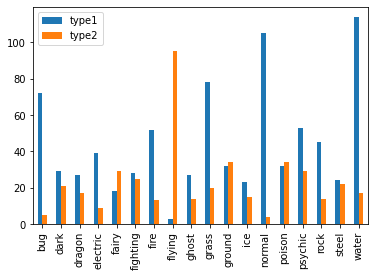

In [4]:
print(len(df['type1'].unique()))
df_types = df[['type1', 'type2']].apply(pd.Series.value_counts)
display(df_types)
df_types.plot.bar()

## Part (c)
### 4 points

`'weight_kg'` (unsurprisingly) is the weight in kilograms of a given Pokémon. `'base_total'` is the "base stat total" of a Pokémon, which is the sum of its HP, attack, speed, etc. Simply put, the base total is a measure of a Pokémon's overall strength.

Plot separate distribution plots for the columns `'weight_kg'` and `'base_total'`, overlaying the estimated distribution (kde) on each histogram. Print the skew value for each column along with its plot.

Are these distributions normal? Include your answers as an in-line comment within your code cell(s).

weight_kg skew:  4.8710444546306055 : skew > 1,  distribution of weight_kg data is not normal
base_total skew:  0.1745927583435159 : skew is between -1 and 1, distribution of base_total data is normal


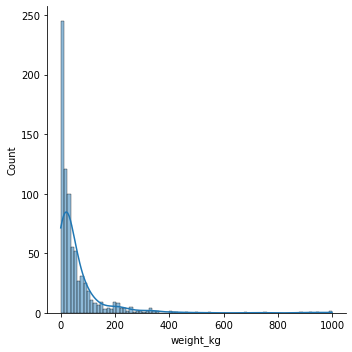

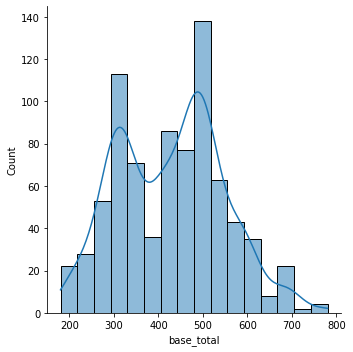

In [5]:

sns.displot(df, x="weight_kg", kde= True)
print("weight_kg skew: ", df.weight_kg.skew(), ": skew > 1,  distribution of weight_kg data is not normal")
sns.displot(df, x= "base_total", kde= True)
print("base_total skew: ", df.base_total.skew(), ": skew is between -1 and 1, distribution of base_total data is normal")
#The dual peaks on the base_total shows a bimodal shape

# Question 2 - z-test

This question will use the `'base_total'` column as the data of interest and the Pokémon from Generation I as the sample set. While z-tests can easily be automated, here we will walk through the process to get a better feel for what's happening "behind the scenes".

## Part (a)
### 2 points

Suppose your friend likes Pokémon but is only familiar with the original 151 from generation 1. They didn't realize that many more games have come out since the first ones and are curious if the overall base totals have changed much with the newer generations. The Pokémon from generation 1 will be our sample.

For this example, we know the population mean and standard deviation. In realistic settings, these are given from outside sources, but in our case we can calculate them from the dataset of all Pokémon. Compute and print these values.

After determining the population mean (and standard deviation), state the null and alternative hypotheses in a text cell or as an in-line comment.

In [6]:
print(df['base_total'].mean())
print(df['base_total'].std())

#null hypothesis:
# The observed average of the sample base_total reflects the average of the entire pokemon population base_total. 

#alternative hypothesis:
# There is a significant difference in the observed average of the base_total sample from the entire 
#pokemon population base_total. 

428.3770287141074
119.20357658921323


## Part (b)
### 2 points

As a separate data frame, extract the Pokémon that are from generation 1 to use as our sample. Call this variable `gen1`. Confirm that the last Pokémon included in the sample is the 151st (index 150) by printing the tail of `gen1`.

Calculate and print the standard error of the sampling distribution of the mean following the formula given in class:
$$
\sigma_{\bar{X}} = \frac{\sigma}{\sqrt{n}}
$$

In [7]:
gen1 = df[(df['generation'] == 1)]
display(gen1.tail(5))

std_error = (df['base_total'].std())/(len(gen1['base_total'])**(1/2))
print(std_error)


,name,base_total,type1,type2,weight_kg,generation
146,Dratini,300,dragon,NaN,3.3,1
147,Dragonair,420,dragon,NaN,16.5,1
148,Dragonite,600,dragon,flying,210.0,1
149,Mewtwo,780,psychic,NaN,122.0,1
150,Mew,600,psychic,NaN,4.0,1


9.70064948725457


## Part (c)
### 3 points

To demonstrate the properties of the z-distribution, create a Series that is the `'base_total'` column converted into z-scores using the formula:
$$
z = \frac{x-\mu}{\sigma}
$$
for each value $x$ in the column. Plot this distribution to visually confirm the mean is around 0 and the standard deviation is around 1.

Compute and output the "observed z", which is the sample mean converted into a z-score.
$$
z_{observed} = \frac{\bar{X} - \mu}{\sigma_{\bar{X}}}
$$

-1.2499547685852919


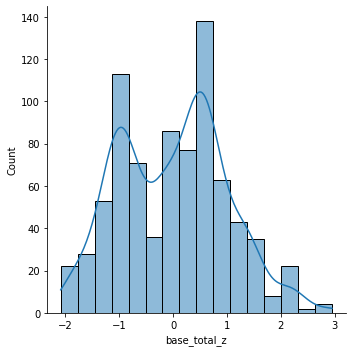

In [8]:
df['base_total_z'] = (df['base_total'] - df['base_total'].mean())/df['base_total'].std(ddof=0)
sns.displot(df, x= "base_total_z", kde= True)

observed_z = (gen1['base_total'].mean()- df['base_total'].mean())/std_error
print(observed_z)

## Part (d)
### 2 points

Using a confidence level of $\alpha=0.05$ and corresponding critical values of $\pm1.96$, determine if the null hypothesis should be rejected or retained. State a conclusion regarding base totals of all Pokémon based on this decision rule.

The null hypothesis should be retained because there is not strong enough evidence to reject the null hypothsis.  The conclusions is that The observed average of the sample base_total reflects the average of the entire pokemon population base_total. 

# Question 3 - t-test

Base totals again are the data of interest, but now with two independent samples of mostly male Pokémon from generation 1 and mostly female Pokémon from generation 1.

## Part (a)
### 3 points

As an example of a two-sample t-test, let's suppose we are interested in seeing if there is any bias coming from the designers of the games regarding the base totals for Pokémon that are more likely to be male and those that are more likely to be female (the intuition being that the base totals for mostly female Pokémon are perhaps lower than those of mostly males). The two-sample t-test will determine if the mean base totals between these two groups significantly differ.

Start by extracting the Pokémon from `gen1` whose `'percentage_male'` is strictly greater than 50 in a separate data frame. Do the same for mostly female Pokémon whose `'percentage_male'` is strictly less than 50. *Note that we are excluding Pokémon whose `'percentage_male'` is equal to 50.*

Confirm the normality of these two group's `'base_total'` values using distribution plots and skewness value as before.

,name,base_total,type1,type2,weight_kg,generation,percentage_male
0,Bulbasaur,318,grass,poison,6.9,1,88.1
1,Ivysaur,405,grass,poison,13.0,1,88.1
2,Venusaur,625,grass,poison,100.0,1,88.1
3,Charmander,309,fire,NaN,8.5,1,88.1
4,Charmeleon,405,fire,NaN,19.0,1,88.1


,name,base_total,type1,type2,weight_kg,generation,percentage_male
28,Nidoran♀,275,poison,NaN,7.0,1,0.0
29,Nidorina,365,poison,NaN,20.0,1,0.0
30,Nidoqueen,505,poison,ground,60.0,1,0.0
34,Clefairy,323,fairy,NaN,7.5,1,24.6
35,Clefable,483,fairy,NaN,40.0,1,24.6


male base_total skew:  0.1073057362993733 : skew is between -1 and 1, distribution is normal
female base_total skew:  -0.02523749124096716 : skew is between -1 and 1, distribution is normal


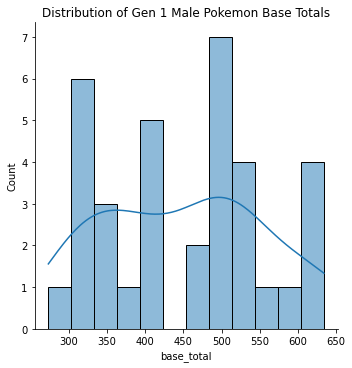

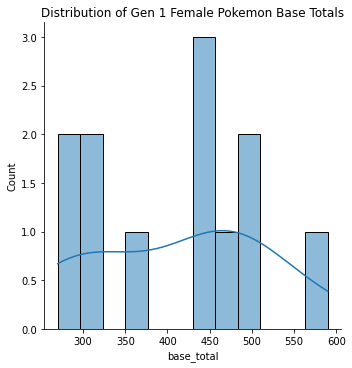

In [9]:
df2 = pd.read_csv('pokemon.csv')

columns2= ['name', 'base_total', 'type1', 'type2', 'weight_kg', 'generation', 'percentage_male']

df2 = df2[columns2]

gen1_male= df2[(df2['generation'] == 1) & (df2['percentage_male'] >50)]
display(gen1_male.head(5))

gen1_female= df2[(df2['generation'] == 1) & (df2['percentage_male'] <50)]
display(gen1_female.head(5))

sns.displot(gen1_male, x= "base_total", bins= 12, kde= True).set(title='Distribution of Gen 1 Male Pokemon Base Totals')
sns.displot(gen1_female, x= "base_total", bins= 12, kde= True).set(title='Distribution of Gen 1 Female Pokemon Base Totals')
print("male base_total skew: ", gen1_male.base_total.skew(), ": skew is between -1 and 1, distribution is normal")
print("female base_total skew: ", gen1_female.base_total.skew(), ": skew is between -1 and 1, distribution is normal")

## Part (b)
### 2 points

Generally the t-test requires an assumption that the variance between the two independent groups is roughly equal (called "homogeneity of variance"). The t-test method given by `stats` can actually account for when the variance is unequal as well. Regardless, we need to know which is the case for our data, so let's check using the Levene test. Again, we're interested in the `'base_total'` values of each group - mostly male and mostly female.

In [11]:
from scipy import stats
test_stat, p_value = stats.levene(gen1_male['base_total'], gen1_female['base_total'])
alpha = 0.05

if p_value > alpha:
    print("Retain H0 - variance is roughly equal")
else:
    print("Reject H0 - variance is not equal")

print(f"alpha: {alpha}")
print(f"p-value: {p_value}")  # if p-value is not less than 0.05 then we cannot reject null hypothesis that variance is the same
print(f"test stat: {test_stat}")

Retain H0 - variance is roughly equal
alpha: 0.05
p-value: 0.7408294278242322
test stat: 0.1107570254698387


## Part (c)
### 3 points

Now that we know what to set the `equal_var` parameter to (either `True` or `False`), perform the t-test for two independent samples. Use the resulting p-value and an alpha of 0.05 to determine if the null hypothesis can be rejected or not. State your conclusion either as an in-line comment with your t-test code or as a separate text cell.

In [12]:
stats.ttest_ind(gen1_male['base_total'], gen1_female['base_total'], equal_var=True)

#Conclusion: Based on the p-value of 0.29, we fail to reject the null hypothesis and 
#conclude that the average base total of male and female Pokemon do not significantly differ. 


Ttest_indResult(statistic=1.050915461492849, pvalue=0.2989084640467425)

# Question 4 - ANOVA

Again we use base totals, but with three independent subsets of the population: Pokémon from generations 1, 2, and 3.

## Part (a)
### 3 points

Suppose another friend of yours was super into Pokémon for a while, playing the first three generations of the games for hours on end when they were a kid. They are curious if the base totals of Pokémon between generations stays relatively the same, or if there are perhaps generations that are "overpowered". To test this, we can use ANOVA.

Start by extracting the Pokémon from generations 2 and 3 into variables called `gen2` and `gen3`, just as we did earlier with `gen1`.

Plot all three generations on the same distribution plot using their generation value to adjust the color of the plot. This can be easily achieved by creating a combined data frame with all three generations appended one after the other (`gen1` appended with `gen2` appended with `gen3`). You can then use Seaborn's `displot` method to plot histograms of all three generations with `hue` set accordingly. Set the `multiple` parameter to `'dodge'` to make each bar sit side-by-side with the others.

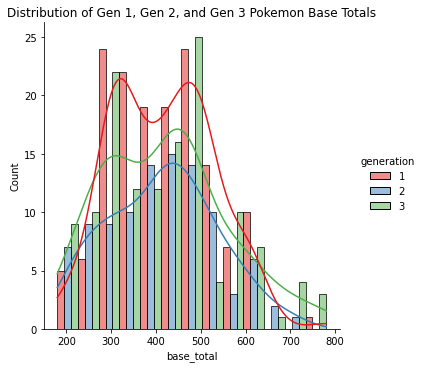

In [13]:
gen2 = df[(df['generation'] == 2)]
gen3 = df[(df['generation'] == 3)]

gen_1to3= pd.concat([gen1, gen2, gen3])
sns.displot(gen_1to3, x= "base_total", hue= "generation", kde= True, multiple= 'dodge', palette= "Set1").set(title='Distribution of Gen 1, Gen 2, and Gen 3 Pokemon Base Totals')


## Part (b)
### 2 points

As we did for t-tests, test for equal variance among the three samples. For ANOVA, this ultimately is of little consequence since the F-test is robust to violation of the homogeneity of variance, but it's worth checking nonetheless. 

In [14]:
test_stat, p_value = stats.levene(gen1['base_total'], gen2['base_total'], gen3['base_total'])
alpha = 0.05

if p_value > alpha:
    print("Retain H0 - variance is roughly equal")
else:
    print("Reject H0 - variance is not equal")

print(f"alpha: {alpha}")
print(f"p-value: {p_value}")
print(f"test stat: {test_stat}")

Retain H0 - variance is roughly equal
alpha: 0.05
p-value: 0.1404649672280984
test stat: 1.9728905563651231


## Part (c)
### 3 points

Perform the ANOVA test on the base totals of generations 1, 2, and 3. Given an alpha of 0.05, include your conclusion as an in-line comment in your code or as a separate text cell.

In [15]:
stats.f_oneway(gen1['base_total'], gen2['base_total'], gen3['base_total'])

#conclusion: we cannot reject the null hypothesis because of the resulting p-value
# (0.91).  The F statistic is less than 1, which means there is not a significant difference between the means. 

F_onewayResult(statistic=0.09048015905055794, pvalue=0.913511978321936)